# Project 1 : Digit Recognizer
Pour plus de détails, [Click ici](https://www.kaggle.com/c/digit-recognizer/data)

In [7]:
# load libs
import numpy as np
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sn

In [79]:
# extract data
#data = ZipFile("dataset.zip")
#data.extractall()

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df_train.iloc[:,1:].values
y = df_train.iloc[:,0].values
X_pred = df_test.values

del df_train, df_test

visualisation des données

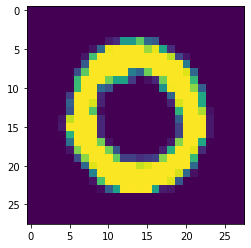

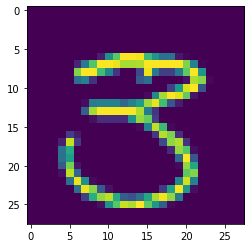

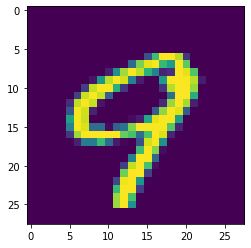

In [65]:
i = [1 , 7 , 100]
n= int(np.sqrt(X[0].shape[0])) # for print 
for p, idx  in enumerate(i):
    plt.figure()
    plt.imshow(X[idx].reshape(n,n))
    #ax.title("Number "+str(y[idx]))

In [27]:
from collections import Counter
count = Counter(y)

<BarContainer object of 10 artists>

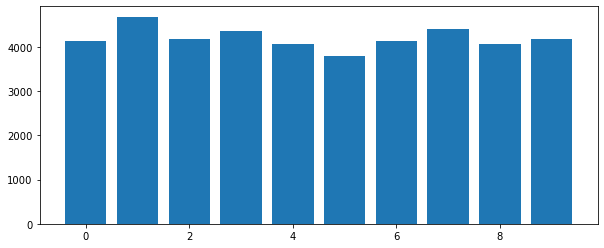

In [73]:
# visualisation des données : equilibrée !
plt.figure(figsize=(10,4))
plt.bar(list(count.keys()), list(count.values()))

In [74]:
# centrer les données 
X = X /255
X_pred = X_pred / 255

In [75]:
print("Train set shape ",X.shape)
print("Test set shape ",X_pred.shape)

Train set shape  (42000, 784)
Test set shape  (28000, 784)


les modeles de classifications qu'on va utiliser sont :

- Simple reseau de neurones
- Support vector machine
- K plus proche voisins

In [77]:
# MLP classifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)

In [85]:
print("Train set shape ",X_train.shape)
print("Test set shape ",X_test.shape)

Train set shape  (31500, 784)
Test set shape  (10500, 784)


In [79]:
X_train.max()

1.0

## 1 - MLP 

In [80]:
clf = MLPClassifier(hidden_layer_sizes=(100,), 
                    random_state=1, max_iter=300)
clf.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

In [81]:
print("Train accuracy %.3f" %clf.score(X_train, y_train))
print("Test accuracy %.3f" %clf.score(X_test, y_test))

Train accuracy 1.000
Test accuracy 0.974


In [82]:
from sklearn.metrics import confusion_matrix

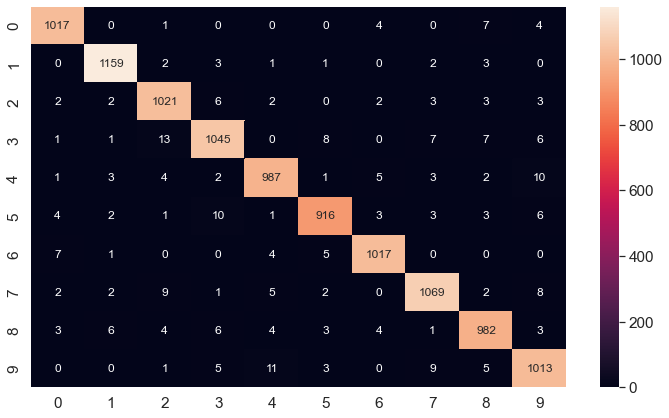

In [83]:
y_pred = clf.predict(X_test)

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(10), range(10))
plt.figure(figsize=(12,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, fmt='g', annot_kws={"size": 12}) # font size, ftm='g' to disable scientific notation
plt.show()

## 2 - SVM

In [84]:
from sklearn.svm import SVC

In [85]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [93]:
print("Train accuracy %.3f" %clf.score(X_train, y_train))
print("Test accuracy %.3f" %clf.score(X_test, y_test))

Train accuracy 0.988
Test accuracy 0.973
